In [7]:
import matplotlib.pyplot as plt 

from src.problem import MultiODProblem
from src.gurobi.gurobi_formulation import formulation
from src.gurobi.utils import display_gurobi_result, generate_paths_from_gurobi_result

In [8]:
p = MultiODProblem(num_O=10, num_taxi=1, seed=2)
X, m = formulation(p, '2D')
m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 517 rows, 506 columns and 2710 nonzeros
Model fingerprint: 0x4bd58566
Variable types: 22 continuous, 484 integer (484 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [5e-02, 1e+00]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+01]
Presolve removed 85 rows and 75 columns
Presolve time: 0.00s
Presolved: 432 rows, 431 columns, 1972 nonzeros
Variable types: 20 continuous, 411 integer (411 binary)

Root relaxation: objective 2.517765e+00, 108 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    2.51776    0   32          -    2.51776      -     -    0s
     0     0    

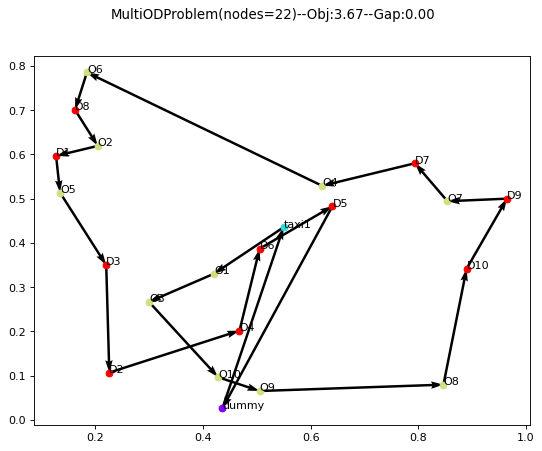

In [9]:
fig = display_gurobi_result(X, m, p)
plt.show()

In [5]:
paths = generate_paths_from_gurobi_result(X)

In [6]:
p.is_feasible(paths)

True